In [1]:
import torch
from torch import nn


# Import all the models that are to be trained over here
from models.newmodels.fusionweb import FusionSCWave
from models.scnet.scnet_wave_mffm_trans import SCNetWaveMFFMTrans, SCNetWaveMFFMTrans_v2



from train.xloop import oneloop
from train.misc import TrainElements, get_model_size,\
check_model, def_hyp, def_dev
from datasets.defaults import get_def_ds
import numpy as np
import gc

In [2]:
device = def_dev()

# Number of minutes of the input sample
mins = 7

In [3]:
input_shape = (24, mins * 6000)

# In order to check the weights of the model and if the input shape is compatible with the output
model = SCNetWaveMFFMTrans_v2(5, 5, 0.5, 0.3, 1, 4)
check_model(model, input_shape)

Model Size = 411086
Input shape = torch.Size([7, 24, 42000])


/home/anaconda/anaconda3/envs/braindecode/lib/python3.8/site-packages/torch/nn/functional.py:1381: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "


Output shape = torch.Size([7, 2])


In [4]:

# input_shape = (22, mins * 6000)

# # In order to check the weights of the model and if the input shape is compatible with the output
# model = SCNetWaveMFFMTrans(5, 5, 0.5, 0.3, 1, 4)
# check_model(model, input_shape)

In [5]:
# Defining default parameters for the training process
hyps = def_hyp(batch_size=4, epochs=1000, lr=0.0001)
hyps

{'batch_size': 4, 'lr': 0.0001, 'epochs': 1000}

In [6]:
# Defining the dataset (This stores information for tuh and nmt, including the class weight balancing)
tuh, nmt ,nmt_new= get_def_ds(mins)

In [7]:
# Change the dataset currently in use from over here
curr_data = nmt
train_elements = TrainElements(device, norm_elem=curr_data[2])


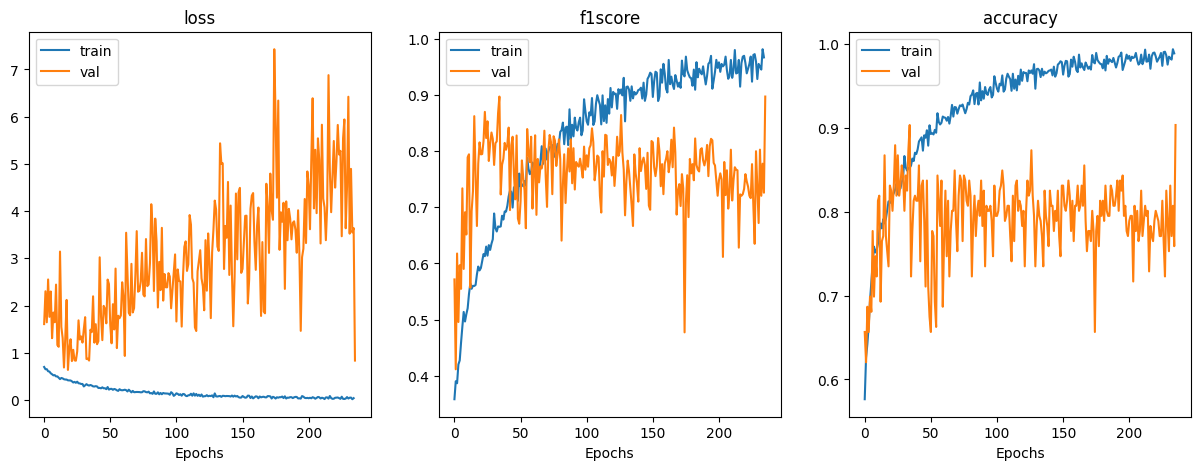


Printing Best:
Loss Wise:
Best Loss: 0.6378066846307163
{'loss': 0.6378066846307163, 'accuracy': 0.7349397540092468, 'precision': 0.6637930870056152, 'recall': 0.9390243887901306, 'f1score': 0.7777777910232544}
Best Accuracy: 0.9036144614219666
{'accuracy': 0.9036144614219666, 'precision': 0.9459459185600281, 'recall': 0.8536585569381714, 'f1score': 0.8974359035491943, 'loss': 0.8356435791995696}


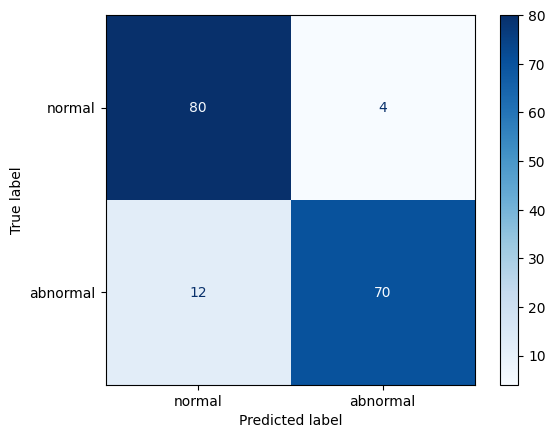

In [8]:
# Change the model being used from here and data if needed, or the model name. Other things are to remain as it is.
model_name = "WaveScnet"
model_x, train_loader, val_loader = oneloop(device, model, input_shape, curr_data[0], "", curr_data[1], hyps, train_elements, curr_data[3], model_name, save_best_acc=True)